C:/Users/Figurova/Documents/labels15.csv
labels15
1.2786983618036822
1.2786983618036822 0.7375999990264234
1.2786983618036822 0.7375999990264234 0.4832521760486943
1.2786983618036822 0.7375999990264234 0.4832521760486943 0.3511080223303183
1.2786983618036822 0.7375999990264234 0.4832521760486943 0.3511080223303183 0.27796181447858037
1.2786983618036822 0.7375999990264234 0.4832521760486943 0.3511080223303183 0.27796181447858037 0.23284934173543562


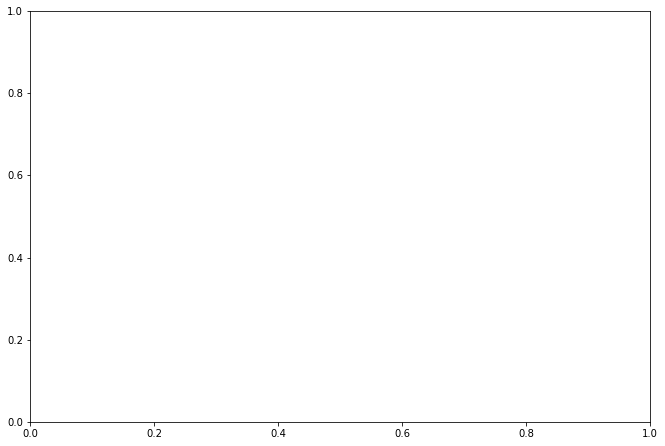

In [4]:
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter import Menu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import statistics

window = tk.Tk()
window.geometry('8400x4200')
window.title("Calcium events")

def compute_baseline(intensity, window):
    #_________________________________________________________________________
    sd, counter, iterations = 1, 0, 7
    sdd = []
    while counter != iterations and sd > 0.26: 
    #while counter != iterations:
        if counter == 0:
            intensity_copy, base_line, base_lines = intensity.copy(), intensity.copy(), []
        else:
            line = []
            for i in range(0, len(intensity)):
                if intensity[i] <= base_line[i]:
                    line.append(intensity[i])
                else:
                    line.append(base_line[i])
            intensity, intensity_copy, base_line = line.copy(), line, line.copy()
        
        for k in range(int(window / 2)):
            intensity_copy.insert(k, intensity[0]) 
            
        for n in range(int(window / 2)):
            intensity_copy.append(intensity[-1]) 
        
        L = int(window/2)
        base_line = []
        for i in range(L, len(intensity_copy)-L):
            if (i + L + 1) >= int(window / 2):
                a = intensity_copy[i-L:i+L+1]
                c = sum(intensity_copy[i-L:i+L+1])/ window
                base_line.append(c)
        base_lines.append(base_line)  

        difference = np.array(base_line) - np.array(intensity)
        difference_mod = [0 if x < 0 else x for x in difference]
        sd = ((1 / (len(intensity) - 1)) * sum([i**2 for i in difference_mod]))**0.5
        sdd.append(sd)
        print(*sdd)
        counter  += 1
    if sdd[-1] <= 0.26 and len(sdd) != 1:
        return base_lines[:-1], sdd
    else:
        return base_lines, sdd

def file():
    f = filedialog.askopenfilename() 
    print(f)
    ff = f.split("/")
    nam = (ff[-1])
    nam = nam.split(".")
    name = nam[0]
    print(name)
    data = pd.read_csv(f, sep = ", ", header = None, engine='python')
    data["int"] = data[0]
    data["int"]
    intensity = list(data["int"])
    window = 95
    base_lines, sdd = compute_baseline(intensity, window)
    
    if sdd[-1] <= 0.27 and len(sdd) == 1:
        length = len(data["int"])
        n = np.arange(0, int(length/3), 0.333333)
        n = n[:-1]
        ax.plot(n, intensity, label = "интенсивность") 
        ax.plot(n, base_lines[-1], c = "g", label = "базовая линия")
        up = [(x + 1.24) for x in  base_lines[-1]]
        down = [(x - 1.24) for x in  base_lines[-1]]
        ax.fill_between(n, base_lines[-1], up, facecolor='g',alpha = 0.3,color = 'g', linewidth = 2, label = "базовая линия ±3σ")   
        ax.fill_between(n, base_lines[-1], down, facecolor='g',alpha = 0.3,color = 'g', linewidth = 2) 
        ax.set_ylabel("Интенсивность свечения", fontsize = 13)
        ax.set_xlabel("Время, с", fontsize = 13)
        plt.xlim(-0.001, len(intensity)/3)
        ax.legend(fontsize = 12, facecolor = "white", framealpha = 1)
        canvas.draw()
        ax.clear() 
    
    else:
        #_________________________________________________________________________ 

        borders_y, borders_x, borders_xx, base_line = [],[],[], base_lines[-1]
        for i in range(0, len(intensity)-1): 
            if (intensity[i] <= base_line[i] and intensity[i+1] >= base_line[i+1]):
                borders_y.append(base_line[i])
                borders_x.append(i)
                borders_xx.append(i * (1/3))
            if  (intensity[i] >= base_line[i] and intensity[i+1] <= base_line[i+1]):
                borders_y.append(base_line[i])
                borders_x.append(i)
                borders_xx.append(i * (1/3))

        #_________________________________________________________________________ 
        intensity = list(data["int"])
        absolute_value  = []
        maximum_value = []
        index_maximum = []
        event_borders_new = []
        base =  base_lines[-1]

        if (borders_x[0] == 0 and intensity[borders_x[0]] <= borders_y[0]) or (intensity[borders_x[0]-1] <= borders_y[0]):
            begin = 0
        else: 
            begin = 1
        for i in range(begin, len(borders_x)-1, 2):
            maximum = max(intensity[borders_x[i]:borders_x[i+1]])
            minimum = base[intensity.index(maximum)]
            absolut = maximum-minimum
            if absolut >= 2.06:
                absolute_value.append(absolut)
                maximum_value.append(maximum)
                index_maximum.append(intensity.index(maximum) * (1/3))

                event_borders_new.append(borders_xx[i])
                event_borders_new.append(borders_xx[i+1])

        a = len(absolute_value)
        v.set(a)

        #_________________________________________________________________________
        duration = []
        for i in range(0, len(event_borders_new), 2):
            duration.append(event_borders_new[i+1] - event_borders_new[i])

        b = round(statistics.mean(duration), 2)
        g.set(b)
        #_________________________________________________________________________
        o = round((len(absolute_value)/13.33), 2)
        k.set(o)
        #_________________________________________________________________________
        if len(absolute_value) != 0:
            frame = pd.DataFrame({'Количество': a, "Частота": o,\
                                  'Средняя длина': b, "Амплитуда":absolute_value, "Длительность" :duration})
            frame.to_csv("63.txt", sep = "\t", index = False)
        #_________________________________________________________________________
        length = len(data["int"])
        n = np.arange(0, int(length/3), 0.333333)
        n = n[:-1]
        ax.plot(n, intensity, label = "интенсивность") 
        ax.plot(n, base_lines[-1], c = "g", label = "базовая линия")
        up = [(x + 1.24) for x in  base_lines[-1]]
        down = [(x - 1.24) for x in  base_lines[-1]]
        ax.fill_between(n, base_lines[-1], up, facecolor='g',alpha = 0.3,color = 'g', linewidth = 2, label = "базовая линия ±3σ")   
        ax.fill_between(n, base_lines[-1], down, facecolor='g',alpha = 0.3,color = 'g', linewidth = 2) 
        ax.vlines(event_borders_new[0], min(intensity), max(intensity), color = 'm', label = "границы событий")
        for i in range(1, len(event_borders_new)):
            ax.vlines(event_borders_new[i], min(intensity), max(intensity), color = 'm')
        for i in range(0, len(maximum_value)):
            ax.plot([index_maximum[i]], [maximum_value[i]], "ko", ms = 7)

        ax.set_ylabel("Интенсивность свечения", fontsize = 13, labelpad = 13)
        ax.set_xlabel("Время, с", fontsize = 13, labelpad = 13)
        plt.xlim(-0.001, len(intensity)/3)
        ax.legend(fontsize = 12, facecolor = "white", framealpha = 1)
        canvas.draw()
        ax.clear()
 
    
    
menu = Menu(window)
menu.add_command(label='Файл', command = file)
window.config(menu=menu)


tk.Label(window, text='Количество событий в клетке').grid(row=0, column=0)
tk.Label(window, text='Средняя длительность событий в клетке').grid(row=1, column=0)
tk.Label(window, text='Частота событий в минуту').grid(row=2, column=0)

v = tk.StringVar()
g = tk.StringVar()
k = tk.StringVar()

entry = tk.Entry(window, textvariable=v).grid(row=0, column=1)
entry = tk.Entry(window, textvariable=g).grid(row=1, column=1)
entry = tk.Entry(window, textvariable=k).grid(row=2, column=1)


fig, ax = plt.subplots(figsize =(10, 7))

canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().grid(row=3, column=2, ipadx=40, ipady=20)

window.mainloop()

